Decision-Tree-Classifier

In [1]:
%pip install fast-ml
%pip install seaborn
%pip install tqdm
%pip install fast-ml
%pip install scikit-learn
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
train_dataset = pd.read_csv('../updated_train.csv')
label_encoder = LabelEncoder()
train_dataset['Sex'] = label_encoder.fit_transform(train_dataset['Sex'])

In [4]:
# hyperparameter optemization
from sklearn.model_selection import GridSearchCV
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(train_dataset, target = 'Survived', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)


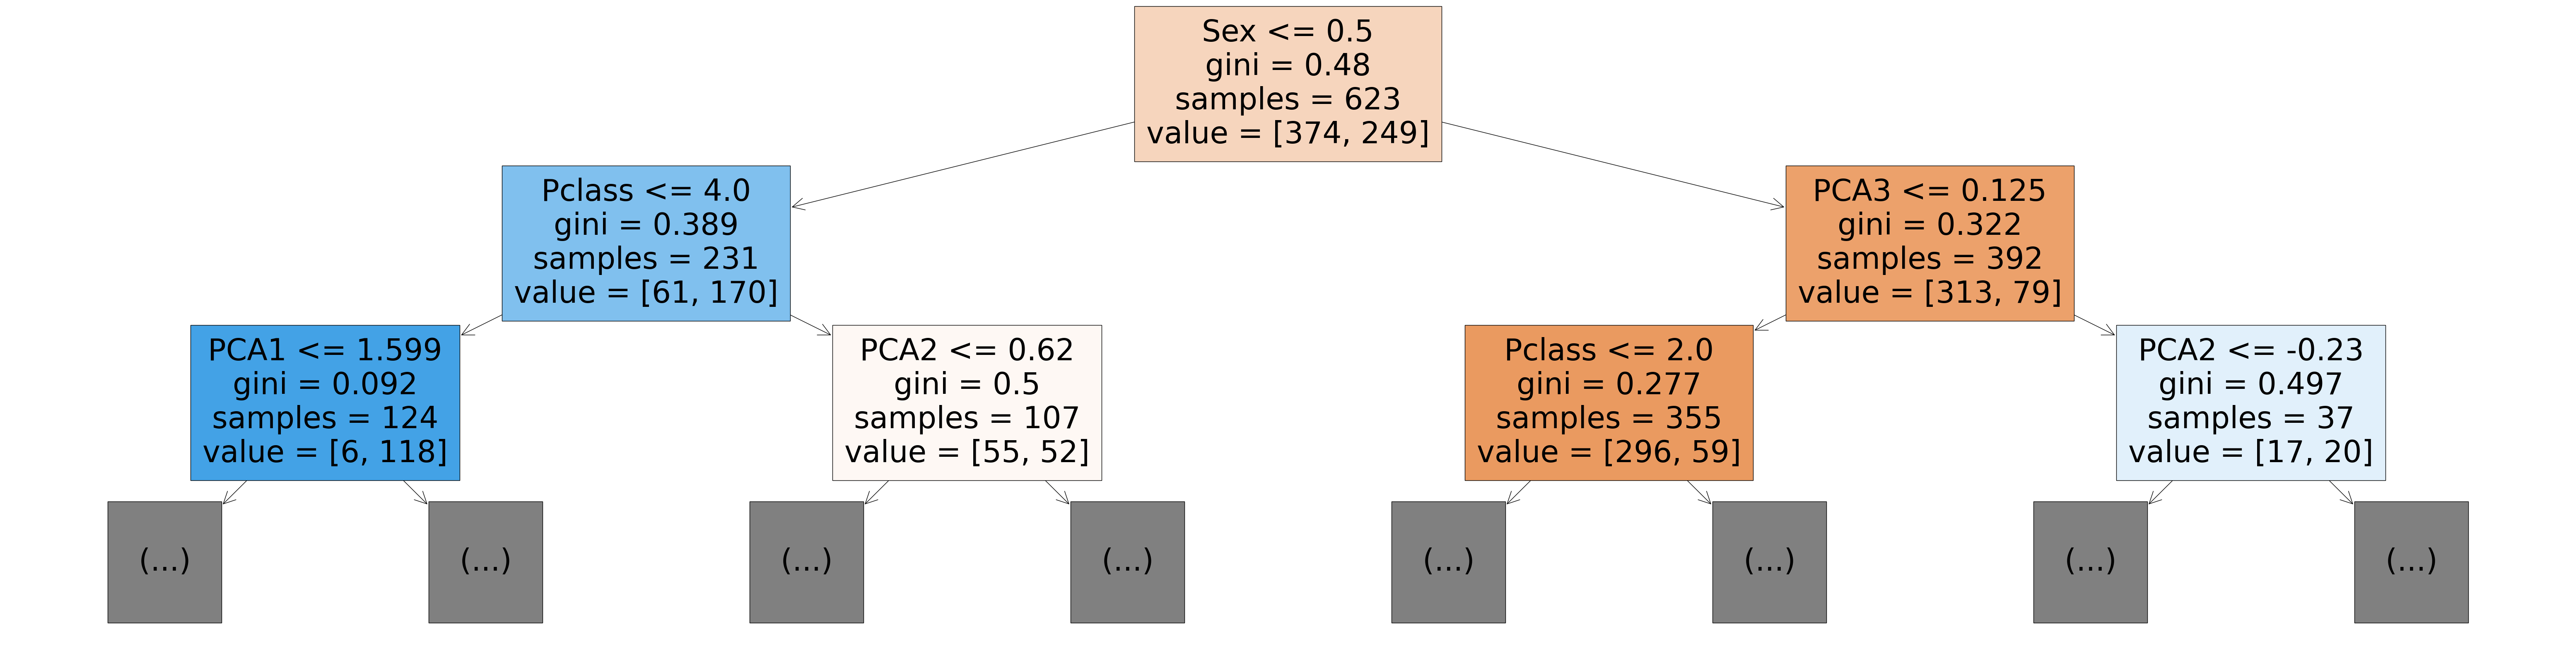

In [5]:
#defining and Fitting decision tree model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(classifier, feature_names=X_train.columns, max_depth=2, filled=True);

In [6]:
#Tuning the hyperparameters
param_grid = {     
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6] 
}
gs = GridSearchCV(classifier, param_grid=param_grid,scoring=["accuracy","f1","precision","recall","roc_auc"],cv=10,n_jobs=-1,refit="accuracy")
g_res = gs.fit(X_valid, y_valid)
g_res.best_score_

0.8576923076923076

In [7]:
# get the hyperparameters with the best score
g_res.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [8]:
y_pred = g_res.predict(X_test)

In [9]:
# precesion score
from sklearn.metrics import precision_score
print("Precesion Score:",precision_score(y_test, y_pred, average='macro'))

Precesion Score: 0.7827170207185943


In [10]:
# Recall Score
from sklearn.metrics import recall_score
print("Recall Score:",recall_score(y_test, y_pred, average='macro'))

Recall Score: 0.7528142589118199


In [11]:
# F1-Score
from sklearn.metrics import f1_score
print("F1-Score:",f1_score(y_test, y_pred, average='macro'))

F1-Score: 0.7612288786482335


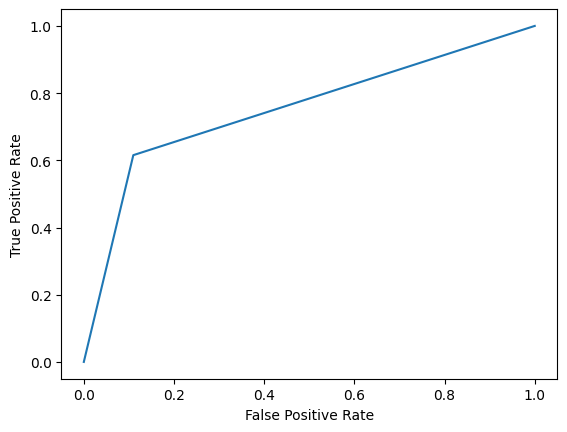

In [12]:
# ROC/AUC Curves
%matplotlib inline
from sklearn.metrics import roc_curve
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(y_test,y_pred)

In [ ]:
# ROC AUC Score 
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_pred)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7398089913813184


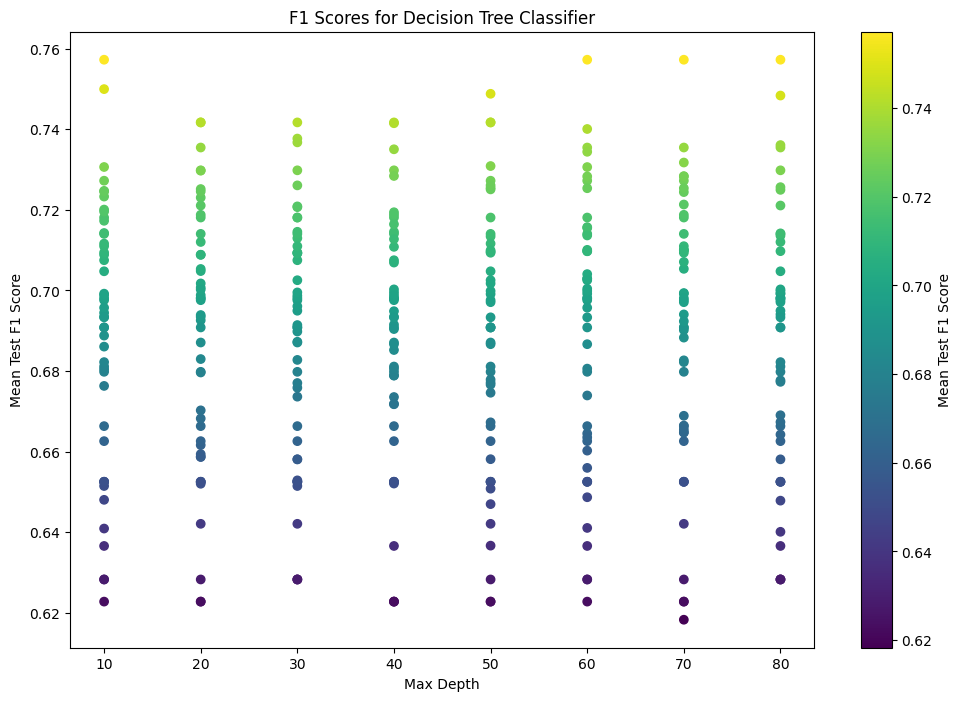

In [ ]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_f1']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
max_depth_values = [param['max_depth'] for param in params]

# Create a 2D scatter plot to visualize the F1 scores
plt.figure(figsize=(12, 8))
plt.scatter(max_depth_values, f1_scores, c=f1_scores, cmap='viridis', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test F1 Score')
plt.title('F1 Scores for Decision Tree Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Mean Test F1 Score')

plt.show()


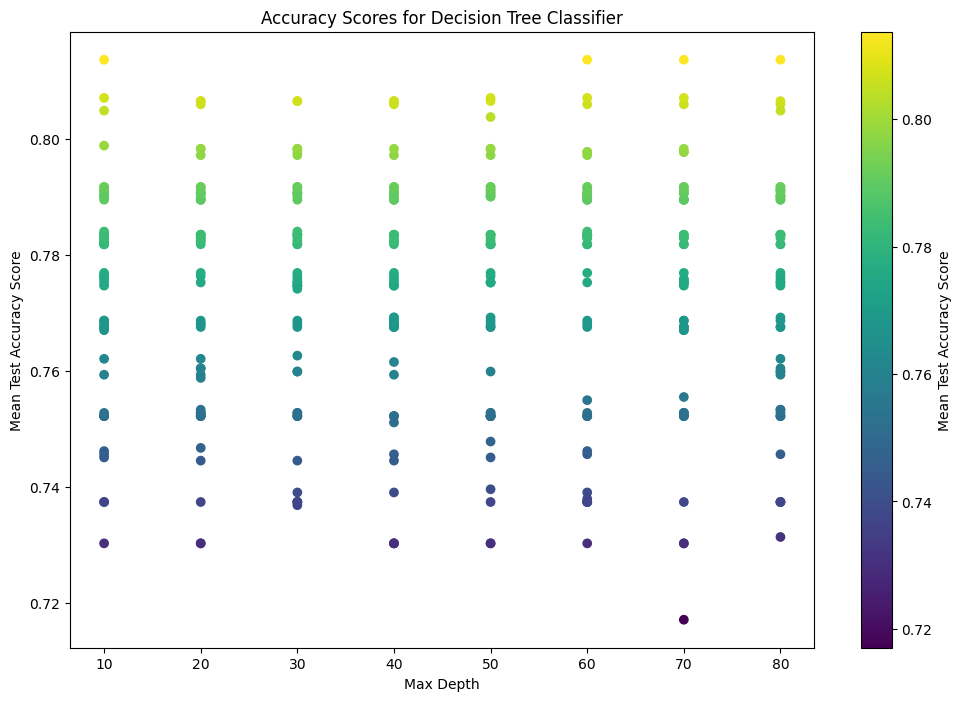

In [ ]:
# Extract the Accuracy scores and hyperparameters from the cv_results_
accuracy_scores = g_res.cv_results_['mean_test_accuracy']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
max_depth_values = [param['max_depth'] for param in params]

# Create a 2D scatter plot to visualize the Accuracy scores
plt.figure(figsize=(12, 8))
plt.scatter(max_depth_values, accuracy_scores, c=accuracy_scores, cmap='viridis', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Accuracy Score')
plt.title('Accuracy Scores for Decision Tree Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Mean Test Accuracy Score')

plt.show()


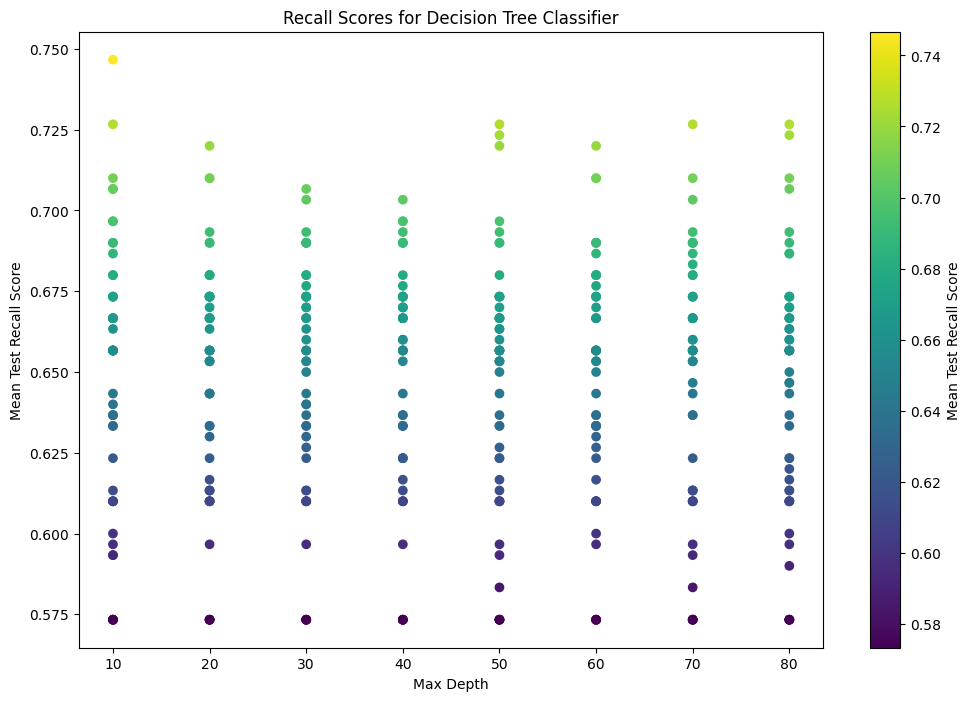

In [ ]:
# Extract the Recall scores and hyperparameters from the cv_results_
recall_scores = g_res.cv_results_['mean_test_recall']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
max_depth_values = [param['max_depth'] for param in params]

# Create a 2D scatter plot to visualize the Recall scores
plt.figure(figsize=(12, 8))
plt.scatter(max_depth_values, recall_scores, c=recall_scores, cmap='viridis', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Recall Score')
plt.title('Recall Scores for Decision Tree Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Mean Test Recall Score')

plt.show()


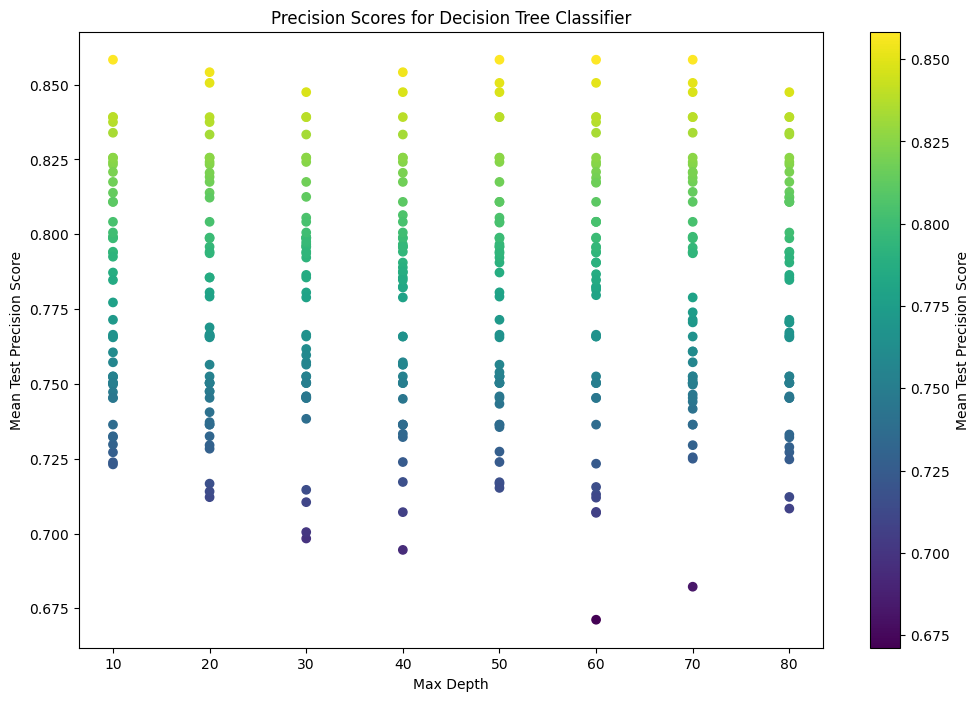

In [ ]:
# Extract the Precision scores and hyperparameters from the cv_results_
precision_scores = g_res.cv_results_['mean_test_precision']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
max_depth_values = [param['max_depth'] for param in params]

# Create a 2D scatter plot to visualize the Precision scores
plt.figure(figsize=(12, 8))
plt.scatter(max_depth_values, precision_scores, c=precision_scores, cmap='viridis', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Precision Score')
plt.title('Precision Scores for Decision Tree Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Mean Test Precision Score')

plt.show()
